In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 380)

import math, os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# from xgboost import XGBRegressor

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt, style
import seaborn as sns
from seaborn import heatmap

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import svm

In [4]:
data = pd.read_csv('./bihar_features_gee.csv', encoding='utf8', engine='python')
data.shape

In [47]:
def make_nan(x): 
    if x < 0: return np.nan
    return x
    
data['eH'] = data['eH'].apply(make_nan)
data.head()

,CEN_2011,NAME,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,07VIIRS_10th,08VIIRS_10th,09VIIRS_10th,10VIIRS_10th,11VIIRS_10th,12VIIRS_10th,01VIIRS_25th,02VIIRS_25th,03VIIRS_25th,04VIIRS_25th,05VIIRS_25th,06VIIRS_25th,07VIIRS_25th,08VIIRS_25th,09VIIRS_25th,10VIIRS_25th,11VIIRS_25th,12VIIRS_25th,01VIIRS_75th,02VIIRS_75th,03VIIRS_75th,04VIIRS_75th,05VIIRS_75th,06VIIRS_75th,07VIIRS_75th,08VIIRS_75th,09VIIRS_75th,10VIIRS_75th,11VIIRS_75th,12VIIRS_75th,01VIIRS_90th,02VIIRS_90th,03VIIRS_90th,04VIIRS_90th,05VIIRS_90th,06VIIRS_90th,07VIIRS_90th,08VIIRS_90th,09VIIRS_90th,10VIIRS_90th,11VIIRS_90th,12VIIRS_90th,01VIIRS_MAX,02VIIRS_MAX,03VIIRS_MAX,04VIIRS_MAX,05VIIRS_MAX,06VIIRS_MAX,07VIIRS_MAX,08VIIRS_MAX,09VIIRS_MAX,10VIIRS_MAX,11VIIRS_MAX,12VIIRS_MAX,01VIIRS_MED,02VIIRS_MED,03VIIRS_MED,04VIIRS_MED,05VIIRS_MED,06VIIRS_MED,07VIIRS_MED,08VIIRS_MED,09VIIRS_MED,10VIIRS_MED,11VIIRS_MED,12VIIRS_MED,01VIIRS_MIN,02VIIRS_MIN,03VIIRS_MIN,04VIIRS_MIN,05VIIRS_MIN,06VIIRS_MIN,07VIIRS_MIN,08VIIRS_MIN,09VIIRS_MIN,10VIIRS_MIN,11VIIRS_MIN,12VIIRS_MIN,01VIIRS_STD_DEV,02VIIRS_STD_DEV,03VIIRS_STD_DEV,04VIIRS_STD_DEV,05VIIRS_STD_DEV,06VIIRS_STD_DEV,07VIIRS_STD_DEV,08VIIRS_STD_DEV,09VIIRS_STD_DEV,10VIIRS_STD_DEV,11VIIRS_STD_DEV,12VIIRS_STD_DEV,01EVI_10th,01NDVI_10th,02EVI_10th,02NDVI_10th,03EVI_10th,03NDVI_10th,04EVI_10th,04NDVI_10th,05EVI_10th,05NDVI_10th,06EVI_10th,06NDVI_10th,07EVI_10th,07NDVI_10th,08EVI_10th,08NDVI_10th,09EVI_10th,09NDVI_10th,10EVI_10th,10NDVI_10th,11EVI_10th,11NDVI_10th,12EVI_10th,12NDVI_10th,01EVI_25th,01NDVI_25th,02EVI_25th,02NDVI_25th,03EVI_25th,03NDVI_25th,04EVI_25th,04NDVI_25th,05EVI_25th,05NDVI_25th,06EVI_25th,06NDVI_25th,07EVI_25th,07NDVI_25th,08EVI_25th,08NDVI_25th,09EVI_25th,09NDVI_25th,10EVI_25th,10NDVI_25th,11EVI_25th,11NDVI_25th,12EVI_25th,12NDVI_25th,01EVI_75th,01NDVI_75th,02EVI_75th,02NDVI_75th,03EVI_75th,03NDVI_75th,04EVI_75th,04NDVI_75th,05EVI_75th,05NDVI_75th,06EVI_75th,06NDVI_75th,07EVI_75th,07NDVI_75th,08EVI_75th,08NDVI_75th,09EVI_75th,09NDVI_75th,10EVI_75th,10NDVI_75th,11EVI_75th,11NDVI_75th,12EVI_75th,12NDVI_75th,01EVI_90th,01NDVI_90th,02EVI_90th,02NDVI_90th,03EVI_90th,03NDVI_90th,04EVI_90th,04NDVI_90th,05EVI_90th,05NDVI_90th,06EVI_90th,06NDVI_90th,07EVI_90th,07NDVI_90th,08EVI_90th,08NDVI_90th,09EVI_90th,09NDVI_90th,10EVI_90th,10NDVI_90th,11EVI_90th,11NDVI_90th,12EVI_90th,12NDVI_90th,01EVI_MAX,01NDVI_MAX,02EVI_MAX,02NDVI_MAX,03EVI_MAX,03NDVI_MAX,04EVI_MAX,04NDVI_MAX,05EVI_MAX,05NDVI_MAX,06EVI_MAX,06NDVI_MAX,07EVI_MAX,07NDVI_MAX,08EVI_MAX,08NDVI_MAX,09EVI_MAX,09NDVI_MAX,10EVI_MAX,10NDVI_MAX,11EVI_MAX,11NDVI_MAX,12EVI_MAX,12NDVI_MAX,01EVI_MED,01NDVI_MED,02EVI_MED,02NDVI_MED,03EVI_MED,03NDVI_MED,04EVI_MED,04NDVI_MED,05EVI_MED,05NDVI_MED,06EVI_MED,06NDVI_MED,07EVI_MED,07NDVI_MED,08EVI_MED,08NDVI_MED,09EVI_MED,09NDVI_MED,10EVI_MED,10NDVI_MED,11EVI_MED,11NDVI_MED,12EVI_MED,12NDVI_MED,01EVI_MIN,01NDVI_MIN,02EVI_MIN,02NDVI_MIN,03EVI_MIN,03NDVI_MIN,04EVI_MIN,04NDVI_MIN,05EVI_MIN,05NDVI_MIN,06EVI_MIN,06NDVI_MIN,07EVI_MIN,07NDVI_MIN,08EVI_MIN,08NDVI_MIN,09EVI_MIN,09NDVI_MIN,10EVI_MIN,10NDVI_MIN,11EVI_MIN,11NDVI_MIN,12EVI_MIN,12NDVI_MIN,01EVI_STD_DEV,01NDVI_STD_DEV,02EVI_STD_DEV,02NDVI_STD_DEV,03EVI_STD_DEV,03NDVI_STD_DEV,04EVI_STD_DEV,04NDVI_STD_DEV,05EVI_STD_DEV,05NDVI_STD_DEV,06EVI_STD_DEV,06NDVI_STD_DEV,07EVI_STD_DEV,07NDVI_STD_DEV,08EVI_STD_DEV,08NDVI_STD_DEV,09EVI_STD_DEV,09NDVI_STD_DEV,10EVI_STD_DEV,10NDVI_STD_DEV,11EVI_STD_DEV,11NDVI_STD_DEV,12EVI_STD_DEV,12NDVI_STD_DEV,POP_DENS_10th,POP_DENS_25th,POP_DENS_75th,POP_DENS_90th,POP_DENS_MIN,POP_DENS_MAX,POP_DENS_MED,POP_DENS_STD_DEV,B1_10th,B10_10th,B11_10th,B2_10th,B3_10th,B4_10th,B5_10th,B6_10th,B7_10th,B1_25th,B10_25th,B11_25th,B2_25th,B3_25th,B4_25th,B5_25th,B6_25th,B7_25th,B1_75th,B10_75th,B11_75th,B2_75th,B3_75th,B4_75th,B5_75th,B6_75th,B7_75th,B1_90th,B10_90th,B11_90th,B2_90th,B3_90th,B4_90th,B5_90th,B6_90th,B7_90th,B1_MAX,B10_MAX,B11_MAX,B2_MAX,B3_MAX,B4_MAX,B5_MAX,B6_MAX,B7_MAX,B1_MED,B10_MED,B11_MED,B2_MED,B3_MED,B4_MED,B5_MED

In [48]:
data['percentage_electrified'] = data['eH']/data['HH']

def binarize(x, thresh = .1): 
    if x <= thresh: return 0
    if x > thresh:return 1

data['electric_category'] = data['percentage_electrified'].apply(binarize)

In [49]:
# Clean duplicate and all-NaN rows
data = data.drop(['NAME'], axis = 1)
    
data = data.drop_duplicates(subset = 'CEN_2011', keep = 'first')
data = data.dropna(thresh=300)
data = data.dropna(how = 'all')
data = data.dropna(how = 'all', axis = 1)
data = data[np.isfinite(data['electric_category'])]
data = data.interpolate(axis=1)

data.shape

(30457, 373)

In [50]:
data.head()

,CEN_2011,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,07VIIRS_10th,08VIIRS_10th,09VIIRS_10th,10VIIRS_10th,11VIIRS_10th,12VIIRS_10th,01VIIRS_25th,02VIIRS_25th,03VIIRS_25th,04VIIRS_25th,05VIIRS_25th,06VIIRS_25th,07VIIRS_25th,08VIIRS_25th,09VIIRS_25th,10VIIRS_25th,11VIIRS_25th,12VIIRS_25th,01VIIRS_75th,02VIIRS_75th,03VIIRS_75th,04VIIRS_75th,05VIIRS_75th,06VIIRS_75th,07VIIRS_75th,08VIIRS_75th,09VIIRS_75th,10VIIRS_75th,11VIIRS_75th,12VIIRS_75th,01VIIRS_90th,02VIIRS_90th,03VIIRS_90th,04VIIRS_90th,05VIIRS_90th,06VIIRS_90th,07VIIRS_90th,08VIIRS_90th,09VIIRS_90th,10VIIRS_90th,11VIIRS_90th,12VIIRS_90th,01VIIRS_MAX,02VIIRS_MAX,03VIIRS_MAX,04VIIRS_MAX,05VIIRS_MAX,06VIIRS_MAX,07VIIRS_MAX,08VIIRS_MAX,09VIIRS_MAX,10VIIRS_MAX,11VIIRS_MAX,12VIIRS_MAX,01VIIRS_MED,02VIIRS_MED,03VIIRS_MED,04VIIRS_MED,05VIIRS_MED,06VIIRS_MED,07VIIRS_MED,08VIIRS_MED,09VIIRS_MED,10VIIRS_MED,11VIIRS_MED,12VIIRS_MED,01VIIRS_MIN,02VIIRS_MIN,03VIIRS_MIN,04VIIRS_MIN,05VIIRS_MIN,06VIIRS_MIN,07VIIRS_MIN,08VIIRS_MIN,09VIIRS_MIN,10VIIRS_MIN,11VIIRS_MIN,12VIIRS_MIN,01VIIRS_STD_DEV,02VIIRS_STD_DEV,03VIIRS_STD_DEV,04VIIRS_STD_DEV,05VIIRS_STD_DEV,06VIIRS_STD_DEV,07VIIRS_STD_DEV,08VIIRS_STD_DEV,09VIIRS_STD_DEV,10VIIRS_STD_DEV,11VIIRS_STD_DEV,12VIIRS_STD_DEV,01EVI_10th,01NDVI_10th,02EVI_10th,02NDVI_10th,03EVI_10th,03NDVI_10th,04EVI_10th,04NDVI_10th,05EVI_10th,05NDVI_10th,06EVI_10th,06NDVI_10th,07EVI_10th,07NDVI_10th,08EVI_10th,08NDVI_10th,09EVI_10th,09NDVI_10th,10EVI_10th,10NDVI_10th,11EVI_10th,11NDVI_10th,12EVI_10th,12NDVI_10th,01EVI_25th,01NDVI_25th,02EVI_25th,02NDVI_25th,03EVI_25th,03NDVI_25th,04EVI_25th,04NDVI_25th,05EVI_25th,05NDVI_25th,06EVI_25th,06NDVI_25th,07EVI_25th,07NDVI_25th,08EVI_25th,08NDVI_25th,09EVI_25th,09NDVI_25th,10EVI_25th,10NDVI_25th,11EVI_25th,11NDVI_25th,12EVI_25th,12NDVI_25th,01EVI_75th,01NDVI_75th,02EVI_75th,02NDVI_75th,03EVI_75th,03NDVI_75th,04EVI_75th,04NDVI_75th,05EVI_75th,05NDVI_75th,06EVI_75th,06NDVI_75th,07EVI_75th,07NDVI_75th,08EVI_75th,08NDVI_75th,09EVI_75th,09NDVI_75th,10EVI_75th,10NDVI_75th,11EVI_75th,11NDVI_75th,12EVI_75th,12NDVI_75th,01EVI_90th,01NDVI_90th,02EVI_90th,02NDVI_90th,03EVI_90th,03NDVI_90th,04EVI_90th,04NDVI_90th,05EVI_90th,05NDVI_90th,06EVI_90th,06NDVI_90th,07EVI_90th,07NDVI_90th,08EVI_90th,08NDVI_90th,09EVI_90th,09NDVI_90th,10EVI_90th,10NDVI_90th,11EVI_90th,11NDVI_90th,12EVI_90th,12NDVI_90th,01EVI_MAX,01NDVI_MAX,02EVI_MAX,02NDVI_MAX,03EVI_MAX,03NDVI_MAX,04EVI_MAX,04NDVI_MAX,05EVI_MAX,05NDVI_MAX,06EVI_MAX,06NDVI_MAX,07EVI_MAX,07NDVI_MAX,08EVI_MAX,08NDVI_MAX,09EVI_MAX,09NDVI_MAX,10EVI_MAX,10NDVI_MAX,11EVI_MAX,11NDVI_MAX,12EVI_MAX,12NDVI_MAX,01EVI_MED,01NDVI_MED,02EVI_MED,02NDVI_MED,03EVI_MED,03NDVI_MED,04EVI_MED,04NDVI_MED,05EVI_MED,05NDVI_MED,06EVI_MED,06NDVI_MED,07EVI_MED,07NDVI_MED,08EVI_MED,08NDVI_MED,09EVI_MED,09NDVI_MED,10EVI_MED,10NDVI_MED,11EVI_MED,11NDVI_MED,12EVI_MED,12NDVI_MED,01EVI_MIN,01NDVI_MIN,02EVI_MIN,02NDVI_MIN,03EVI_MIN,03NDVI_MIN,04EVI_MIN,04NDVI_MIN,05EVI_MIN,05NDVI_MIN,06EVI_MIN,06NDVI_MIN,07EVI_MIN,07NDVI_MIN,08EVI_MIN,08NDVI_MIN,09EVI_MIN,09NDVI_MIN,10EVI_MIN,10NDVI_MIN,11EVI_MIN,11NDVI_MIN,12EVI_MIN,12NDVI_MIN,01EVI_STD_DEV,01NDVI_STD_DEV,02EVI_STD_DEV,02NDVI_STD_DEV,03EVI_STD_DEV,03NDVI_STD_DEV,04EVI_STD_DEV,04NDVI_STD_DEV,05EVI_STD_DEV,05NDVI_STD_DEV,06EVI_STD_DEV,06NDVI_STD_DEV,07EVI_STD_DEV,07NDVI_STD_DEV,08EVI_STD_DEV,08NDVI_STD_DEV,09EVI_STD_DEV,09NDVI_STD_DEV,10EVI_STD_DEV,10NDVI_STD_DEV,11EVI_STD_DEV,11NDVI_STD_DEV,12EVI_STD_DEV,12NDVI_STD_DEV,POP_DENS_10th,POP_DENS_25th,POP_DENS_75th,POP_DENS_90th,POP_DENS_MIN,POP_DENS_MAX,POP_DENS_MED,POP_DENS_STD_DEV,B1_10th,B10_10th,B11_10th,B2_10th,B3_10th,B4_10th,B5_10th,B6_10th,B7_10th,B1_25th,B10_25th,B11_25th,B2_25th,B3_25th,B4_25th,B5_25th,B6_25th,B7_25th,B1_75th,B10_75th,B11_75th,B2_75th,B3_75th,B4_75th,B5_75th,B6_75th,B7_75th,B1_90th,B10_90th,B11_90th,B2_90th,B3_90th,B4_90th,B5_90th,B6_90th,B7_90th,B1_MAX,B10_MAX,B11_MAX,B2_MAX,B3_MAX,B4_MAX,B5_MAX,B6_MAX,B7_MAX,B1_MED,B10_MED,B11_MED,B2_MED,B3_MED,B4_MED,B5_MED,B6_M

In [51]:
data.to_csv('data.csv')

In [20]:
# start here

In [21]:
data = pd.read_csv('data.csv')
for col_name in data.columns:
        if str(col_name[:7]) == 'Unnamed':
            del data[col_name]
            
print (data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30457 entries, 0 to 30456
Columns: 373 entries, CEN_2011 to electric_category
dtypes: float64(373)
memory usage: 86.7 MB
None


,CEN_2011,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,07VIIRS_10th,08VIIRS_10th,09VIIRS_10th,10VIIRS_10th,11VIIRS_10th,12VIIRS_10th,01VIIRS_25th,02VIIRS_25th,03VIIRS_25th,04VIIRS_25th,05VIIRS_25th,06VIIRS_25th,07VIIRS_25th,08VIIRS_25th,09VIIRS_25th,10VIIRS_25th,11VIIRS_25th,12VIIRS_25th,01VIIRS_75th,02VIIRS_75th,03VIIRS_75th,04VIIRS_75th,05VIIRS_75th,06VIIRS_75th,07VIIRS_75th,08VIIRS_75th,09VIIRS_75th,10VIIRS_75th,11VIIRS_75th,12VIIRS_75th,01VIIRS_90th,02VIIRS_90th,03VIIRS_90th,04VIIRS_90th,05VIIRS_90th,06VIIRS_90th,07VIIRS_90th,08VIIRS_90th,09VIIRS_90th,10VIIRS_90th,11VIIRS_90th,12VIIRS_90th,01VIIRS_MAX,02VIIRS_MAX,03VIIRS_MAX,04VIIRS_MAX,05VIIRS_MAX,06VIIRS_MAX,07VIIRS_MAX,08VIIRS_MAX,09VIIRS_MAX,10VIIRS_MAX,11VIIRS_MAX,12VIIRS_MAX,01VIIRS_MED,02VIIRS_MED,03VIIRS_MED,04VIIRS_MED,05VIIRS_MED,06VIIRS_MED,07VIIRS_MED,08VIIRS_MED,09VIIRS_MED,10VIIRS_MED,11VIIRS_MED,12VIIRS_MED,01VIIRS_MIN,02VIIRS_MIN,03VIIRS_MIN,04VIIRS_MIN,05VIIRS_MIN,06VIIRS_MIN,07VIIRS_MIN,08VIIRS_MIN,09VIIRS_MIN,10VIIRS_MIN,11VIIRS_MIN,12VIIRS_MIN,01VIIRS_STD_DEV,02VIIRS_STD_DEV,03VIIRS_STD_DEV,04VIIRS_STD_DEV,05VIIRS_STD_DEV,06VIIRS_STD_DEV,07VIIRS_STD_DEV,08VIIRS_STD_DEV,09VIIRS_STD_DEV,10VIIRS_STD_DEV,11VIIRS_STD_DEV,12VIIRS_STD_DEV,01EVI_10th,01NDVI_10th,02EVI_10th,02NDVI_10th,03EVI_10th,03NDVI_10th,04EVI_10th,04NDVI_10th,05EVI_10th,05NDVI_10th,06EVI_10th,06NDVI_10th,07EVI_10th,07NDVI_10th,08EVI_10th,08NDVI_10th,09EVI_10th,09NDVI_10th,10EVI_10th,10NDVI_10th,11EVI_10th,11NDVI_10th,12EVI_10th,12NDVI_10th,01EVI_25th,01NDVI_25th,02EVI_25th,02NDVI_25th,03EVI_25th,03NDVI_25th,04EVI_25th,04NDVI_25th,05EVI_25th,05NDVI_25th,06EVI_25th,06NDVI_25th,07EVI_25th,07NDVI_25th,08EVI_25th,08NDVI_25th,09EVI_25th,09NDVI_25th,10EVI_25th,10NDVI_25th,11EVI_25th,11NDVI_25th,12EVI_25th,12NDVI_25th,01EVI_75th,01NDVI_75th,02EVI_75th,02NDVI_75th,03EVI_75th,03NDVI_75th,04EVI_75th,04NDVI_75th,05EVI_75th,05NDVI_75th,06EVI_75th,06NDVI_75th,07EVI_75th,07NDVI_75th,08EVI_75th,08NDVI_75th,09EVI_75th,09NDVI_75th,10EVI_75th,10NDVI_75th,11EVI_75th,11NDVI_75th,12EVI_75th,12NDVI_75th,01EVI_90th,01NDVI_90th,02EVI_90th,02NDVI_90th,03EVI_90th,03NDVI_90th,04EVI_90th,04NDVI_90th,05EVI_90th,05NDVI_90th,06EVI_90th,06NDVI_90th,07EVI_90th,07NDVI_90th,08EVI_90th,08NDVI_90th,09EVI_90th,09NDVI_90th,10EVI_90th,10NDVI_90th,11EVI_90th,11NDVI_90th,12EVI_90th,12NDVI_90th,01EVI_MAX,01NDVI_MAX,02EVI_MAX,02NDVI_MAX,03EVI_MAX,03NDVI_MAX,04EVI_MAX,04NDVI_MAX,05EVI_MAX,05NDVI_MAX,06EVI_MAX,06NDVI_MAX,07EVI_MAX,07NDVI_MAX,08EVI_MAX,08NDVI_MAX,09EVI_MAX,09NDVI_MAX,10EVI_MAX,10NDVI_MAX,11EVI_MAX,11NDVI_MAX,12EVI_MAX,12NDVI_MAX,01EVI_MED,01NDVI_MED,02EVI_MED,02NDVI_MED,03EVI_MED,03NDVI_MED,04EVI_MED,04NDVI_MED,05EVI_MED,05NDVI_MED,06EVI_MED,06NDVI_MED,07EVI_MED,07NDVI_MED,08EVI_MED,08NDVI_MED,09EVI_MED,09NDVI_MED,10EVI_MED,10NDVI_MED,11EVI_MED,11NDVI_MED,12EVI_MED,12NDVI_MED,01EVI_MIN,01NDVI_MIN,02EVI_MIN,02NDVI_MIN,03EVI_MIN,03NDVI_MIN,04EVI_MIN,04NDVI_MIN,05EVI_MIN,05NDVI_MIN,06EVI_MIN,06NDVI_MIN,07EVI_MIN,07NDVI_MIN,08EVI_MIN,08NDVI_MIN,09EVI_MIN,09NDVI_MIN,10EVI_MIN,10NDVI_MIN,11EVI_MIN,11NDVI_MIN,12EVI_MIN,12NDVI_MIN,01EVI_STD_DEV,01NDVI_STD_DEV,02EVI_STD_DEV,02NDVI_STD_DEV,03EVI_STD_DEV,03NDVI_STD_DEV,04EVI_STD_DEV,04NDVI_STD_DEV,05EVI_STD_DEV,05NDVI_STD_DEV,06EVI_STD_DEV,06NDVI_STD_DEV,07EVI_STD_DEV,07NDVI_STD_DEV,08EVI_STD_DEV,08NDVI_STD_DEV,09EVI_STD_DEV,09NDVI_STD_DEV,10EVI_STD_DEV,10NDVI_STD_DEV,11EVI_STD_DEV,11NDVI_STD_DEV,12EVI_STD_DEV,12NDVI_STD_DEV,POP_DENS_10th,POP_DENS_25th,POP_DENS_75th,POP_DENS_90th,POP_DENS_MIN,POP_DENS_MAX,POP_DENS_MED,POP_DENS_STD_DEV,B1_10th,B10_10th,B11_10th,B2_10th,B3_10th,B4_10th,B5_10th,B6_10th,B7_10th,B1_25th,B10_25th,B11_25th,B2_25th,B3_25th,B4_25th,B5_25th,B6_25th,B7_25th,B1_75th,B10_75th,B11_75th,B2_75th,B3_75th,B4_75th,B5_75th,B6_75th,B7_75th,B1_90th,B10_90th,B11_90th,B2_90th,B3_90th,B4_90th,B5_90th,B6_90th,B7_90th,B1_MAX,B10_MAX,B11_MAX,B2_MAX,B3_MAX,B4_MAX,B5_MAX,B6_MAX,B7_MAX,B1_MED,B10_MED,B11_MED,B2_MED,B3_MED,B4_MED,B5_MED,B6_M

In [22]:
# data = data[['02VIIRS_75th', '01VIIRS_MED', '04VIIRS_MED', '02VIIRS_MIN', '01VIIRS_25th',
#        '12VIIRS_75th', '08VIIRS_90th', '03VIIRS_10th', '04EVI_75th',
#        'POP_DENS_75th', '11VIIRS_MED', '01VIIRS_90th', '08EVI_MED',
#        'POP_DENS_90th', '08EVI_MAX', '08NDVI_MAX', '08VIIRS_75th',
#        '11VIIRS_90th', 'POP_DENS_10th', '08EVI_10th', '04NDVI_90th',
#        '08EVI_90th', 'B3_MIN', '02VIIRS_10th', 'B1_MIN', 'B10_25th', 'B6_MIN',
#        '05NDVI_75th', '10EVI_MED', '01NDVI_25th', '07VIIRS_90th', 'B11_MED',
#        'B11_MIN', 'B11_MAX', '02EVI_10th', 'B7_MAX', 'B6_STD_DEV',
#        '02VIIRS_90th', '06VIIRS_25th', '05EVI_90th', '08VIIRS_10th',
#        '12EVI_90th', '09NDVI_MIN', '02EVI_MAX', '10EVI_MIN', 'B11_10th',
#        'B4_10th', '02VIIRS_MAX', '08EVI_MIN', 'B10_10th', '04EVI_25th', 'electric_category']]

# data = data[['POP_DENS_MAX', 'POP_DENS_90th', 'POP_DENS_75th', 'POP_DENS_MED',
#     'POP_DENS_25th', 'POP_DENS_10th', 'POP_DENS_MIN', 'POP_DENS_STD_DEV',
#     '11VIIRS_MAX', '11VIIRS_90th', '02VIIRS_MAX', '02VIIRS_90th',
#     '11VIIRS_75th', '01VIIRS_MAX', '12VIIRS_MAX', '02VIIRS_75th', '03VIIRS_MAX',
#     '10VIIRS_MAX', '01VIIRS_90th', '12VIIRS_90th', '11VIIRS_MED',
#     '10VIIRS_90th', '03VIIRS_90th', '04VIIRS_MAX', '07VIIRS_MAX',
#     '01VIIRS_75th', '12VIIRS_75th', '04VIIRS_90th', '02VIIRS_MED',
#     '10VIIRS_75th', '07VIIRS_90th', '03VIIRS_75th', '05VIIRS_MAX',
#     '11VIIRS_25th', '06VIIRS_MAX', '04VIIRS_75th', '01VIIRS_MED', '12VIIRS_MED',
#     '06VIIRS_90th', '07VIIRS_75th', '05VIIRS_90th', '09VIIRS_MAX',
#     '10VIIRS_MED', '02VIIRS_25th', '08VIIRS_MAX', '05VIIRS_75th', '03VIIRS_MED',
#     '11VIIRS_10th', '09VIIRS_90th', '06VIIRS_75th', 'electric_category']]

# data = data[['POP_DENS_MAX', 'POP_DENS_90th', 'POP_DENS_75th', 'POP_DENS_MED',
#     'POP_DENS_25th', 'POP_DENS_10th', 'POP_DENS_MIN',
#     'POP_DENS_STD_DEV', '11VIIRS_MAX', '11VIIRS_90th', '02VIIRS_MAX',
#     '02VIIRS_90th', '11VIIRS_75th', '01VIIRS_MAX', '12VIIRS_MAX', 'electric_category']]
data.shape

(30457, 373)

In [54]:
data[data['electric_category'] == 1.0]['01VIIRS_MED'].describe()

count    28490.000000
mean         0.777028
std          1.196500
min         -0.115199
25%          0.289481
50%          0.559289
75%          0.960039
max         47.470741
Name: 01VIIRS_MED, dtype: float64

In [55]:
data[data['electric_category'] == 0.0]['01VIIRS_MED'].describe()

count    1967.000000
mean        0.492071
std         0.865156
min        -0.088914
25%         0.122178
50%         0.297226
75%         0.628134
max        24.343351
Name: 01VIIRS_MED, dtype: float64

In [23]:
# data = data[data['HH'] > 400]
df, test_data_df = train_test_split(data, test_size=0.2)
print ('Train Shape', df.shape, 'Test Shape', test_data_df.shape)
print ('Train Classes')
print (df.electric_category.value_counts())
print ('Test Classes')
print (test_data_df.electric_category.value_counts())

Train Shape (24365, 373) Test Shape (6092, 373)
Train Classes
1.0    22772
0.0     1593
Name: electric_category, dtype: int64
Test Classes
1.0    5718
0.0     374
Name: electric_category, dtype: int64


In [24]:
df0 = df[df.electric_category == 0]
df1 = df[df.electric_category == 1]

print ('Sizes before sampling: ', df1.shape, df0.shape)

df0 = resample(df0, 
                replace=True,     # sample with replacement
                n_samples=12000,  # to match majority class, Was 10000 
                random_state=123) # reproducible results. 

df1 = resample(df1, n_samples = 12000)
df = pd.concat([df1, df0])

print ('Train Shape', df.shape, 'Test Shape', test_data_df.shape)
print ('New Train Classes')
print (df.electric_category.value_counts())
print ('Same Train Classes')
print (test_data_df.electric_category.value_counts())

Sizes before sampling:  (22772, 373) (1593, 373)
Train Shape (24000, 373) Test Shape (6092, 373)
New Train Classes
0.0    12000
1.0    12000
Name: electric_category, dtype: int64
Same Train Classes
1.0    5718
0.0     374
Name: electric_category, dtype: int64


In [25]:
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
# Training 
X_training = df.drop(['electric_category'], axis = 1)
X_training_scaled = pd.DataFrame(scaler.fit_transform(X_training), columns = X_training.columns)
Y_training = df[['electric_category']].values

# Testing
X_testing = test_data_df.drop(['electric_category'], axis = 1)
X_testing_scaled = pd.DataFrame(scaler.transform(X_testing), columns = X_testing.columns)
Y_testing = test_data_df[['electric_category']].values

X_training_scaled.head()

,CEN_2011,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,07VIIRS_10th,08VIIRS_10th,09VIIRS_10th,10VIIRS_10th,11VIIRS_10th,12VIIRS_10th,01VIIRS_25th,02VIIRS_25th,03VIIRS_25th,04VIIRS_25th,05VIIRS_25th,06VIIRS_25th,07VIIRS_25th,08VIIRS_25th,09VIIRS_25th,10VIIRS_25th,11VIIRS_25th,12VIIRS_25th,01VIIRS_75th,02VIIRS_75th,03VIIRS_75th,04VIIRS_75th,05VIIRS_75th,06VIIRS_75th,07VIIRS_75th,08VIIRS_75th,09VIIRS_75th,10VIIRS_75th,11VIIRS_75th,12VIIRS_75th,01VIIRS_90th,02VIIRS_90th,03VIIRS_90th,04VIIRS_90th,05VIIRS_90th,06VIIRS_90th,07VIIRS_90th,08VIIRS_90th,09VIIRS_90th,10VIIRS_90th,11VIIRS_90th,12VIIRS_90th,01VIIRS_MAX,02VIIRS_MAX,03VIIRS_MAX,04VIIRS_MAX,05VIIRS_MAX,06VIIRS_MAX,07VIIRS_MAX,08VIIRS_MAX,09VIIRS_MAX,10VIIRS_MAX,11VIIRS_MAX,12VIIRS_MAX,01VIIRS_MED,02VIIRS_MED,03VIIRS_MED,04VIIRS_MED,05VIIRS_MED,06VIIRS_MED,07VIIRS_MED,08VIIRS_MED,09VIIRS_MED,10VIIRS_MED,11VIIRS_MED,12VIIRS_MED,01VIIRS_MIN,02VIIRS_MIN,03VIIRS_MIN,04VIIRS_MIN,05VIIRS_MIN,06VIIRS_MIN,07VIIRS_MIN,08VIIRS_MIN,09VIIRS_MIN,10VIIRS_MIN,11VIIRS_MIN,12VIIRS_MIN,01VIIRS_STD_DEV,02VIIRS_STD_DEV,03VIIRS_STD_DEV,04VIIRS_STD_DEV,05VIIRS_STD_DEV,06VIIRS_STD_DEV,07VIIRS_STD_DEV,08VIIRS_STD_DEV,09VIIRS_STD_DEV,10VIIRS_STD_DEV,11VIIRS_STD_DEV,12VIIRS_STD_DEV,01EVI_10th,01NDVI_10th,02EVI_10th,02NDVI_10th,03EVI_10th,03NDVI_10th,04EVI_10th,04NDVI_10th,05EVI_10th,05NDVI_10th,06EVI_10th,06NDVI_10th,07EVI_10th,07NDVI_10th,08EVI_10th,08NDVI_10th,09EVI_10th,09NDVI_10th,10EVI_10th,10NDVI_10th,11EVI_10th,11NDVI_10th,12EVI_10th,12NDVI_10th,01EVI_25th,01NDVI_25th,02EVI_25th,02NDVI_25th,03EVI_25th,03NDVI_25th,04EVI_25th,04NDVI_25th,05EVI_25th,05NDVI_25th,06EVI_25th,06NDVI_25th,07EVI_25th,07NDVI_25th,08EVI_25th,08NDVI_25th,09EVI_25th,09NDVI_25th,10EVI_25th,10NDVI_25th,11EVI_25th,11NDVI_25th,12EVI_25th,12NDVI_25th,01EVI_75th,01NDVI_75th,02EVI_75th,02NDVI_75th,03EVI_75th,03NDVI_75th,04EVI_75th,04NDVI_75th,05EVI_75th,05NDVI_75th,06EVI_75th,06NDVI_75th,07EVI_75th,07NDVI_75th,08EVI_75th,08NDVI_75th,09EVI_75th,09NDVI_75th,10EVI_75th,10NDVI_75th,11EVI_75th,11NDVI_75th,12EVI_75th,12NDVI_75th,01EVI_90th,01NDVI_90th,02EVI_90th,02NDVI_90th,03EVI_90th,03NDVI_90th,04EVI_90th,04NDVI_90th,05EVI_90th,05NDVI_90th,06EVI_90th,06NDVI_90th,07EVI_90th,07NDVI_90th,08EVI_90th,08NDVI_90th,09EVI_90th,09NDVI_90th,10EVI_90th,10NDVI_90th,11EVI_90th,11NDVI_90th,12EVI_90th,12NDVI_90th,01EVI_MAX,01NDVI_MAX,02EVI_MAX,02NDVI_MAX,03EVI_MAX,03NDVI_MAX,04EVI_MAX,04NDVI_MAX,05EVI_MAX,05NDVI_MAX,06EVI_MAX,06NDVI_MAX,07EVI_MAX,07NDVI_MAX,08EVI_MAX,08NDVI_MAX,09EVI_MAX,09NDVI_MAX,10EVI_MAX,10NDVI_MAX,11EVI_MAX,11NDVI_MAX,12EVI_MAX,12NDVI_MAX,01EVI_MED,01NDVI_MED,02EVI_MED,02NDVI_MED,03EVI_MED,03NDVI_MED,04EVI_MED,04NDVI_MED,05EVI_MED,05NDVI_MED,06EVI_MED,06NDVI_MED,07EVI_MED,07NDVI_MED,08EVI_MED,08NDVI_MED,09EVI_MED,09NDVI_MED,10EVI_MED,10NDVI_MED,11EVI_MED,11NDVI_MED,12EVI_MED,12NDVI_MED,01EVI_MIN,01NDVI_MIN,02EVI_MIN,02NDVI_MIN,03EVI_MIN,03NDVI_MIN,04EVI_MIN,04NDVI_MIN,05EVI_MIN,05NDVI_MIN,06EVI_MIN,06NDVI_MIN,07EVI_MIN,07NDVI_MIN,08EVI_MIN,08NDVI_MIN,09EVI_MIN,09NDVI_MIN,10EVI_MIN,10NDVI_MIN,11EVI_MIN,11NDVI_MIN,12EVI_MIN,12NDVI_MIN,01EVI_STD_DEV,01NDVI_STD_DEV,02EVI_STD_DEV,02NDVI_STD_DEV,03EVI_STD_DEV,03NDVI_STD_DEV,04EVI_STD_DEV,04NDVI_STD_DEV,05EVI_STD_DEV,05NDVI_STD_DEV,06EVI_STD_DEV,06NDVI_STD_DEV,07EVI_STD_DEV,07NDVI_STD_DEV,08EVI_STD_DEV,08NDVI_STD_DEV,09EVI_STD_DEV,09NDVI_STD_DEV,10EVI_STD_DEV,10NDVI_STD_DEV,11EVI_STD_DEV,11NDVI_STD_DEV,12EVI_STD_DEV,12NDVI_STD_DEV,POP_DENS_10th,POP_DENS_25th,POP_DENS_75th,POP_DENS_90th,POP_DENS_MIN,POP_DENS_MAX,POP_DENS_MED,POP_DENS_STD_DEV,B1_10th,B10_10th,B11_10th,B2_10th,B3_10th,B4_10th,B5_10th,B6_10th,B7_10th,B1_25th,B10_25th,B11_25th,B2_25th,B3_25th,B4_25th,B5_25th,B6_25th,B7_25th,B1_75th,B10_75th,B11_75th,B2_75th,B3_75th,B4_75th,B5_75th,B6_75th,B7_75th,B1_90th,B10_90th,B11_90th,B2_90th,B3_90th,B4_90th,B5_90th,B6_90th,B7_90th,B1_MAX,B10_MAX,B11_MAX,B2_MAX,B3_MAX,B4_MAX,B5_MAX,B6_MAX,B7_MAX,B1_MED,B10_MED,B11_MED,B2_MED,B3_MED,B4_MED,B5_MED,B6_M

In [26]:
X_train = X_training_scaled # X_training_scaled
Y_train = Y_training.ravel()
X_test = X_testing_scaled #X_testing_scaled

In [32]:
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier() #class_weight  = {0: 2, 1:1}
rfe = RFE(rfc, 50)
fit = rfe.fit(X_train, Y_train) 
rfe_predictions = fit.predict(X_test)

print(confusion_matrix(Y_testing, rfc_predictions))
print (classification_report(Y_testing, rfc_predictions))


# model = LogisticRegression()
# rfe = RFE(model, 3)
# fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

[[  19  355]
 [ 448 5270]]
             precision    recall  f1-score   support

        0.0       0.04      0.05      0.05       374
        1.0       0.94      0.92      0.93      5718

avg / total       0.88      0.87      0.87      6092

Num Features: %d


TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [27]:
def plot_confusion_matrix(title, predictions): 
    conf_matrix = confusion_matrix(Y_testing, predictions)
    heatmap(conf_matrix, annot=True, fmt="d", annot_kws={"size":17})
    plt.xlabel('Prediction', fontsize=18)
    plt.ylabel('Truth', fontsize=18)
    plt.title(title, fontsize=22)
    plt.show()

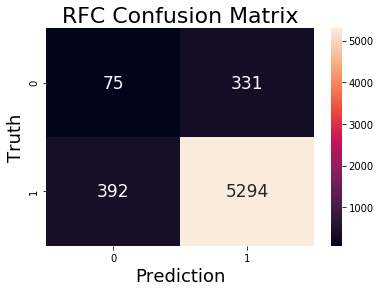

In [15]:
plot_confusion_matrix('RFC Confusion Matrix', rfc_predictions)

In [16]:
gb = GradientBoostingClassifier(n_estimators=45, learning_rate = .56, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_testing, predictions))
print()
print("Classification Report")
print(classification_report(Y_testing, predictions))

Confusion Matrix:
[[ 245  161]
 [1791 3895]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.12      0.60      0.20       406
        1.0       0.96      0.69      0.80      5686

avg / total       0.90      0.68      0.76      6092



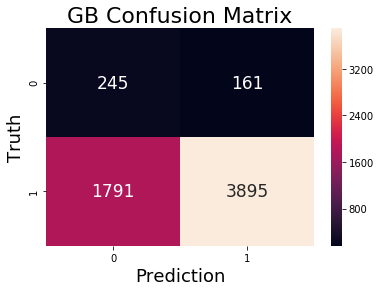

In [17]:
plot_confusion_matrix('GB Confusion Matrix', predictions)

In [18]:
gdb = GradientBoostingClassifier(n_estimators=7,
                                        max_depth=6,
                                        min_samples_split=1780,
                                        min_samples_leaf=1,
                                        random_state=20180320,
                                        subsample=0.8,
                                        learning_rate=0.11) # max_features=310

gdb.fit(X_train, Y_train)
predictions = gdb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_testing, predictions))
print()
print("Classification Report")
print(classification_report(Y_testing, predictions))

Confusion Matrix:
[[ 244  162]
 [1758 3928]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.12      0.60      0.20       406
        1.0       0.96      0.69      0.80      5686

avg / total       0.90      0.68      0.76      6092



In [19]:
estimators = np.arange(5, 50, 5)
learning_rates = np.arange(.01, 2, .05)
d = {}
for es in estimators: 
    for lr in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=es, learning_rate = lr, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(X_train, Y_train)
        predictions = gb.predict(X_test)
        d[str(es) + ' ' + str(lr)] = confusion_matrix(Y_testing, predictions)[0][0]
sorted(d.items(), key=lambda x:x[1])[:-1]

[('5 1.4600000000000002', 207),
 ('40 1.9600000000000002', 207),
 ('35 1.86', 209),
 ('20 1.7100000000000002', 210),
 ('45 1.81', 210),
 ('35 1.81', 213),
 ('30 1.9600000000000002', 215),
 ('30 1.86', 216),
 ('40 1.31', 217),
 ('45 1.86', 217),
 ('20 1.31', 218),
 ('10 1.9100000000000001', 219),
 ('10 1.81', 220),
 ('10 1.86', 221),
 ('30 1.81', 221),
 ('35 1.9600000000000002', 221),
 ('45 1.7100000000000002', 221),
 ('15 1.86', 222),
 ('30 1.76', 222),
 ('40 1.81', 222),
 ('5 1.51', 223),
 ('25 1.81', 223),
 ('30 1.31', 223),
 ('30 1.7100000000000002', 223),
 ('45 1.31', 223),
 ('45 1.9600000000000002', 223),
 ('35 1.2100000000000002', 224),
 ('35 1.76', 224),
 ('40 1.7100000000000002', 224),
 ('10 1.9600000000000002', 225),
 ('35 1.31', 225),
 ('40 1.61', 225),
 ('45 1.61', 225),
 ('25 1.31', 226),
 ('30 1.2100000000000002', 226),
 ('35 1.7100000000000002', 226),
 ('40 0.9600000000000001', 226),
 ('40 1.01', 226),
 ('40 1.86', 226),
 ('45 1.11', 226),
 ('45 1.2100000000000002', 226),

In [373]:
# pca = PCA(.999)
# pca.fit(X_training_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.999, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [374]:
# pca.n_components_

210

In [375]:
# X_training_pca = pca.transform(X_training_scaled)
# X_testing_pca = pca.transform(X_testing_scaled)

In [442]:
print ('The accuracy is {}, with {} villages correctly classified.'.format(accuracy_score(Y_testing,predictions), 
                                                        accuracy_score(Y_testing, predictions, normalize=False)))

The accuracy is 0.8981177500547166, with 8207 villages correctly classified.


In [443]:
test_data_df['predictions'] = predictions
test_data_df.head()

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,02VIIRS_75th,04VIIRS_MED,02VIIRS_MIN,01VIIRS_25th,12VIIRS_75th,08VIIRS_90th,03VIIRS_10th,04EVI_75th,POP_DENS_75th,11VIIRS_MED,01VIIRS_90th,08EVI_MED,POP_DENS_90th,08EVI_MAX,08NDVI_MAX,08VIIRS_75th,11VIIRS_90th,POP_DENS_10th,08EVI_10th,04NDVI_90th,08EVI_90th,B3_MIN,02VIIRS_10th,B1_MIN,B10_25th,B6_MIN,05NDVI_75th,10EVI_MED,01NDVI_25th,07VIIRS_90th,B11_MED,B11_MIN,B11_MAX,02EVI_10th,B7_MAX,B6_STD_DEV,02VIIRS_90th,06VIIRS_25th,05EVI_90th,08VIIRS_10th,12EVI_90th,09NDVI_MIN,02EVI_MAX,10EVI_MIN,B11_10th,B4_10th,02VIIRS_MAX,08EVI_MIN,B10_10th,04EVI_25th,electric_category,predictions
26442,1.346973,0.920630,0.260976,0.787457,0.366480,0.977532,0.233531,0.17110,310.0,0.997164,2.470199,0.32585,2151.0,0.36185,0.66120,0.977532,1.763440,222.0,0.32505,0.27850,0.36185,0.0325,0.380043,0.0007,0.2949,0.0333,0.23860,0.4621,0.35075,2.196919,0.2913,0.2911,0.2990,0.31680,0.1946,0.033305,2.019194,0.513415,0.16315,0.385656,0.23970,0.72135,0.35750,0.3519,0.2912,0.022212,2.019194,0.32505,0.2949,0.14420,1.0,1.0
16054,1.706058,1.285839,0.641156,0.682550,1.296140,1.161080,0.870975,0.20295,515.0,2.253278,1.593017,0.43605,786.0,0.51820,0.72580,1.018652,2.825239,299.0,0.39810,0.33830,0.49680,0.0242,0.960319,-0.0546,0.2911,0.0209,0.31815,0.2936,0.44195,1.584468,0.2923,0.2837,0.3026,0.25995,0.3058,0.056527,1.788802,0.939520,0.25030,0.598971,0.31205,0.59340,0.41655,0.2400,0.2850,0.032772,2.057460,0.28485,0.2890,0.17345,1.0,1.0
20476,1.275036,1.154726,0.767700,0.897899,0.895841,0.859909,0.862803,0.13900,591.0,1.724501,1.205283,0.34515,591.0,0.43030,0.66825,0.808105,2.349375,330.0,0.29750,0.27540,0.41250,-0.0067,0.857434,-0.0772,0.2952,0.0273,0.25395,0.3489,0.52600,0.908552,0.2937,0.2909,0.2991,0.34860,0.2026,0.037091,1.510158,0.931691,0.18370,0.571012,0.27875,0.47125,0.45745,0.3109,0.2914,0.019080,1.510158,0.27470,0.2949,0.13000,1.0,1.0
9152,1.111417,0.479465,0.645648,0.615709,1.292639,0.441262,0.367024,0.28075,243.0,1.330896,0.984605,0.42965,243.0,0.53740,0.77915,0.426809,1.831259,242.0,0.36650,0.44020,0.53740,0.0489,0.645648,0.0145,0.2945,0.0963,0.45240,0.4100,0.48865,2.686707,0.2947,0.2922,0.2992,0.34685,0.1951,0.027485,1.141476,0.430817,0.32150,0.168219,0.27675,0.59935,0.48595,0.2868,0.2932,0.034918,1.141476,0.36650,0.2939,0.22830,1.0,1.0
10987,1.593586,0.602688,0.770028,0.830232,1.314684,0.266400,1.108007,0.18815,206.0,0.993251,1.121924,0.54040,206.0,0.56895,0.68080,0.266400,0.993251,191.0,0.47370,0.29245,0.56895,0.0584,1.029862,0.0177,0.2946,0.0923,0.32675,0.3464,0.48585,1.225203,0.2944,0.2900,0.2998,0.28150,0.1949,0.029389,1.593586,0.373231,0.22315,0.246656,0.22820,0.33485,0.38550,0.3265,0.2904,0.049021,1.593586,0.37685,0.2913,0.17300,1.0,1.0


In [444]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
01VIIRS_25th,0.030
02VIIRS_10th,0.026
02VIIRS_75th,0.025
04VIIRS_MED,0.025
08EVI_MAX,0.025
08EVI_90th,0.025
B4_10th,0.025
03VIIRS_10th,0.023
11VIIRS_MED,0.023


In [4]:
up_df.head()

NameError: name 'up_df' is not defined

In [407]:
importances.sort_values('importance',ascending=False).index[:30]

Index(['02VIIRS_75th', '04VIIRS_MED', '02VIIRS_MIN', '01VIIRS_25th',
       '12VIIRS_75th', '08VIIRS_90th', '03VIIRS_10th', '04EVI_75th',
       'POP_DENS_75th', '11VIIRS_MED', '01VIIRS_90th', '08EVI_MED',
       'POP_DENS_90th', '08EVI_MAX', '08NDVI_MAX', '08VIIRS_75th',
       '11VIIRS_90th', 'POP_DENS_10th', '08EVI_10th', '04NDVI_90th',
       '08EVI_90th', 'B3_MIN', '02VIIRS_10th', 'B1_MIN', 'B10_25th', 'B6_MIN',
       '05NDVI_75th', '10EVI_MED', '01NDVI_25th', '07VIIRS_90th'],
      dtype='object', name='feature')

In [408]:
importances.sort_values('importance',ascending=False).index[:50]

Index(['02VIIRS_75th', '04VIIRS_MED', '02VIIRS_MIN', '01VIIRS_25th',
       '12VIIRS_75th', '08VIIRS_90th', '03VIIRS_10th', '04EVI_75th',
       'POP_DENS_75th', '11VIIRS_MED', '01VIIRS_90th', '08EVI_MED',
       'POP_DENS_90th', '08EVI_MAX', '08NDVI_MAX', '08VIIRS_75th',
       '11VIIRS_90th', 'POP_DENS_10th', '08EVI_10th', '04NDVI_90th',
       '08EVI_90th', 'B3_MIN', '02VIIRS_10th', 'B1_MIN', 'B10_25th', 'B6_MIN',
       '05NDVI_75th', '10EVI_MED', '01NDVI_25th', '07VIIRS_90th', 'B11_MED',
       'B11_MIN', 'B11_MAX', '02EVI_10th', 'B7_MAX', 'B6_STD_DEV',
       '02VIIRS_90th', '06VIIRS_25th', '05EVI_90th', '08VIIRS_10th',
       '12EVI_90th', '09NDVI_MIN', '02EVI_MAX', '10EVI_MIN', 'B11_10th',
       'B4_10th', '02VIIRS_MAX', '08EVI_MIN', 'B10_10th', '04EVI_25th'],
      dtype='object', name='feature')

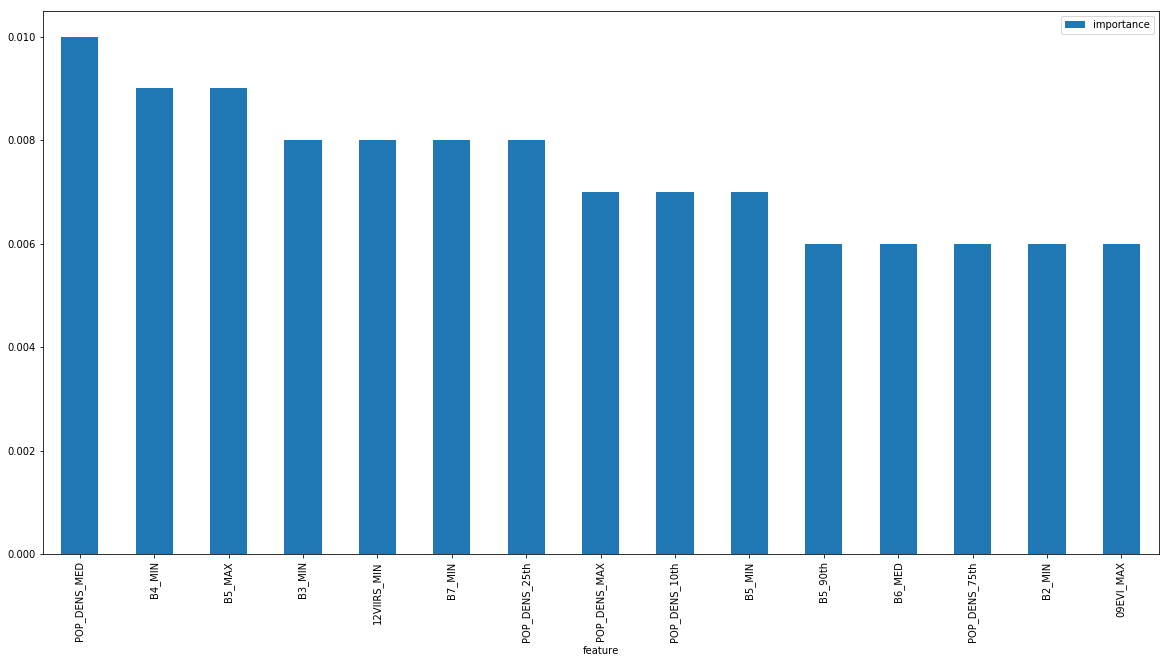

In [365]:
importances.head(15).plot.bar(figsize=(20,10))

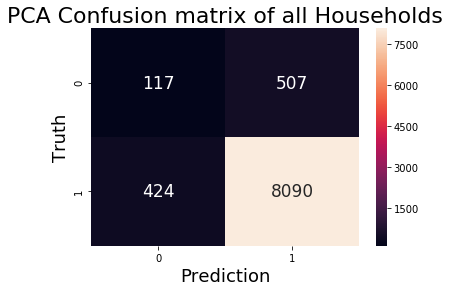

In [445]:
def plot_confusion_matrix(title, predictions): 
    conf_matrix = confusion_matrix(Y_testing, predictions)
    heatmap(conf_matrix, annot=True, fmt="d", annot_kws={"size":17})
    plt.xlabel('Prediction', fontsize=18)
    plt.ylabel('Truth', fontsize=18)
    plt.title(title, fontsize=22)
    plt.show()
    
plot_confusion_matrix('PCA Confusion matrix of all Households', predictions)

In [426]:
from sklearn.metrics import f1_score
f1_score(Y_testing, predictions)

0.9449085704270609

In [427]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_testing, predictions))
print("Recall:",recall_score(Y_testing, predictions))

Precision: 0.9445223078719925
Recall: 0.9452951490356517


In [428]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = forest_model.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_testing, y_scores)

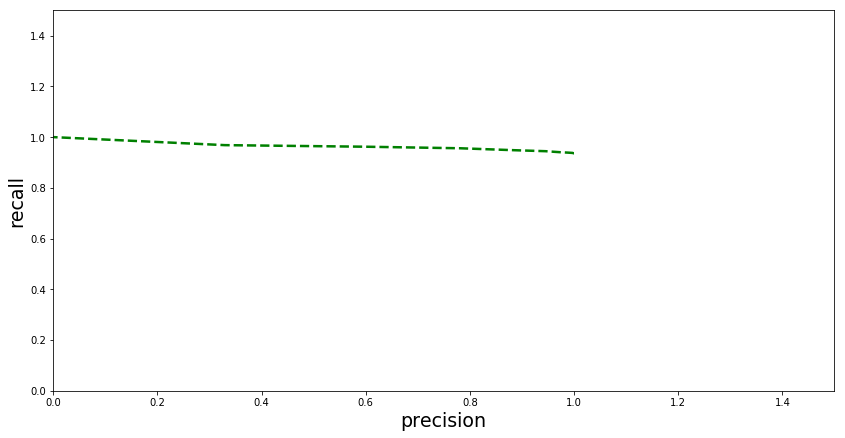

In [429]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [430]:
# ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_testing, y_scores)

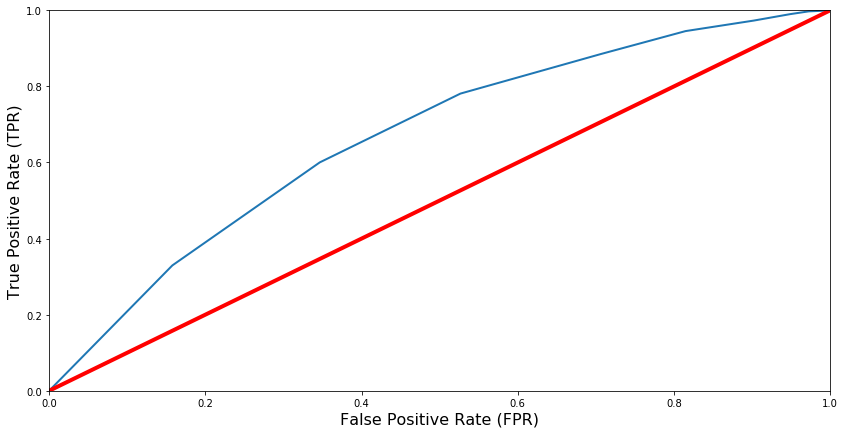

In [431]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [329]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_testing, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6524484436994433


In [446]:
y_scores = forest_model.predict_proba(X_test)
tups1 = [(i, x) for (i, x) in enumerate(y_scores)]
tups1

[(0, array([0.4, 0.6])),
 (1, array([0.1, 0.9])),
 (2, array([0.1, 0.9])),
 (3, array([0., 1.])),
 (4, array([0., 1.])),
 (5, array([0.2, 0.8])),
 (6, array([0.1, 0.9])),
 (7, array([0.1, 0.9])),
 (8, array([0., 1.])),
 (9, array([0., 1.])),
 (10, array([0.3, 0.7])),
 (11, array([0.2, 0.8])),
 (12, array([0.3, 0.7])),
 (13, array([0.2, 0.8])),
 (14, array([0.2, 0.8])),
 (15, array([0.2, 0.8])),
 (16, array([0.1, 0.9])),
 (17, array([0., 1.])),
 (18, array([0.5, 0.5])),
 (19, array([0.1, 0.9])),
 (20, array([0., 1.])),
 (21, array([0.6, 0.4])),
 (22, array([0., 1.])),
 (23, array([0.1, 0.9])),
 (24, array([0.8, 0.2])),
 (25, array([0.1, 0.9])),
 (26, array([0.9, 0.1])),
 (27, array([0.1, 0.9])),
 (28, array([0., 1.])),
 (29, array([0.1, 0.9])),
 (30, array([0.1, 0.9])),
 (31, array([0., 1.])),
 (32, array([0.4, 0.6])),
 (33, array([0.2, 0.8])),
 (34, array([0., 1.])),
 (35, array([0., 1.])),
 (36, array([0.3, 0.7])),
 (37, array([0., 1.])),
 (38, array([0., 1.])),
 (39, array([0., 1.]))

In [447]:
tups2 = [(i, x) for (i, x) in enumerate(Y_testing)]
tups2_0 = [x for x in tups2 if x[1] == 0.]
tups2_0
tups2_ix = [x[0] for x in tups2_0]

In [448]:
tups2_ix

[18,
 24,
 26,
 47,
 120,
 174,
 183,
 198,
 199,
 231,
 259,
 271,
 275,
 282,
 313,
 315,
 357,
 372,
 373,
 379,
 384,
 390,
 395,
 418,
 433,
 434,
 445,
 468,
 477,
 494,
 519,
 524,
 527,
 560,
 578,
 582,
 615,
 634,
 645,
 696,
 704,
 718,
 721,
 748,
 755,
 763,
 765,
 770,
 787,
 797,
 811,
 817,
 885,
 900,
 909,
 918,
 923,
 989,
 1022,
 1024,
 1063,
 1065,
 1077,
 1091,
 1093,
 1103,
 1121,
 1122,
 1190,
 1233,
 1250,
 1288,
 1295,
 1318,
 1335,
 1364,
 1371,
 1375,
 1383,
 1416,
 1419,
 1425,
 1440,
 1452,
 1455,
 1457,
 1480,
 1510,
 1523,
 1525,
 1568,
 1590,
 1607,
 1610,
 1631,
 1642,
 1655,
 1662,
 1677,
 1684,
 1697,
 1705,
 1711,
 1715,
 1716,
 1721,
 1760,
 1766,
 1785,
 1791,
 1792,
 1879,
 1887,
 1899,
 1937,
 1953,
 1978,
 1989,
 2025,
 2026,
 2040,
 2048,
 2050,
 2058,
 2062,
 2069,
 2134,
 2159,
 2179,
 2185,
 2207,
 2211,
 2232,
 2242,
 2303,
 2311,
 2320,
 2348,
 2359,
 2374,
 2400,
 2436,
 2439,
 2441,
 2443,
 2447,
 2457,
 2473,
 2504,
 2505,
 2510,
 2511

In [449]:
filter1 = [x for x in tups1 if x[0] in tups2_ix]

In [450]:
filter1

[(18, array([0.5, 0.5])),
 (24, array([0.8, 0.2])),
 (26, array([0.9, 0.1])),
 (47, array([0.2, 0.8])),
 (120, array([0.6, 0.4])),
 (174, array([0.2, 0.8])),
 (183, array([0.1, 0.9])),
 (198, array([0.3, 0.7])),
 (199, array([0.2, 0.8])),
 (231, array([0.3, 0.7])),
 (259, array([0.6, 0.4])),
 (271, array([0.1, 0.9])),
 (275, array([0.9, 0.1])),
 (282, array([0.4, 0.6])),
 (313, array([0.1, 0.9])),
 (315, array([0.4, 0.6])),
 (357, array([0.4, 0.6])),
 (372, array([0.3, 0.7])),
 (373, array([0.1, 0.9])),
 (379, array([0.2, 0.8])),
 (384, array([0.4, 0.6])),
 (390, array([0., 1.])),
 (395, array([0.1, 0.9])),
 (418, array([0.5, 0.5])),
 (433, array([0.5, 0.5])),
 (434, array([0.4, 0.6])),
 (445, array([0.7, 0.3])),
 (468, array([0.5, 0.5])),
 (477, array([0.2, 0.8])),
 (494, array([0.2, 0.8])),
 (519, array([0., 1.])),
 (524, array([0., 1.])),
 (527, array([0.5, 0.5])),
 (560, array([0., 1.])),
 (578, array([0.6, 0.4])),
 (582, array([0.4, 0.6])),
 (615, array([0., 1.])),
 (634, array([0

In [457]:
new = []
for x in y_scores: 
    if x[0] >= .35: 
        new.append(0)
    else: 
        new.append(1)
new

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [458]:
accuracy_score(Y_testing,new)

0.8558765594221931

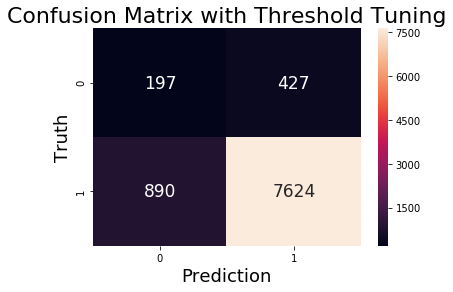

In [460]:
plot_confusion_matrix('Confusion Matrix with Threshold Tuning', new)